# План
1. Eigenfaces руками и с библиотекой
2. Сжатие изображений через SVD

In [1]:
from sklearn.datasets import fetch_lfw_people

In [3]:
data = fetch_lfw_people(min_faces_per_person=40)

In [7]:
data['data'].shape

(1777, 2914)

In [9]:
data['images'].shape

(1777, 62, 47)

In [10]:
from matplotlib import pyplot as plt

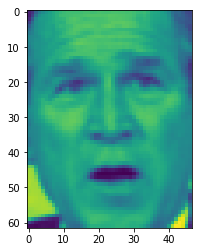

In [17]:
plt.imshow(data['images'][1000])

In [18]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=100)

In [22]:
pca.fit(data['data']);

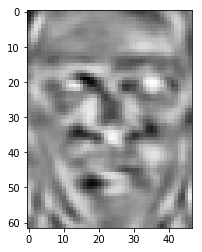

In [34]:
component_image = pca.components_[99].reshape(62, 47)
plt.imshow(component_image, cmap=plt.cm.Greys_r)

In [35]:
pca_transformed = pca.transform(data['data'])

In [46]:
pca.components_.shape

(100, 2914)

In [47]:
low_dimension_image = pca_transformed[:, :50].dot(pca.components_[:50])

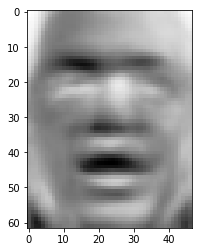

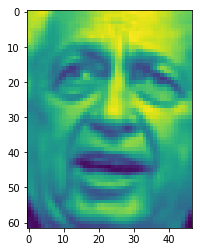

In [48]:
plt.imshow(
    low_dimension_image[0].reshape(62, 47), cmap=plt.cm.Greys_r)
plt.show()
plt.imshow(data['images'][0])

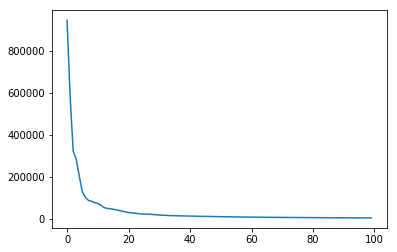

In [50]:
plt.plot(pca.explained_variance_)

In [52]:
image = plt.imread('maxresdefault.jpg')

In [56]:
import numpy as np

In [57]:
grey_cat = np.mean(image, axis=2)

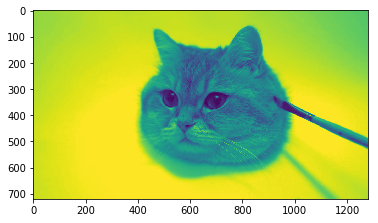

In [58]:
plt.imshow(grey_cat)

In [59]:
u, d, v_t = np.linalg.svd(grey_cat)

In [68]:
v_t  = v_t[:720]

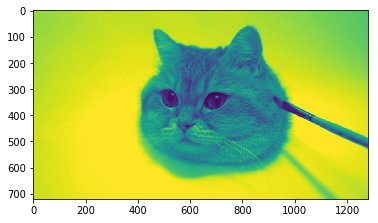

In [67]:
plt.imshow((u * d).dot(v_t[:720]))

In [78]:
n_components = 10

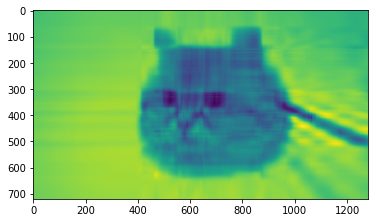

In [79]:
plt.imshow(
    (u[:, :n_components] * d[:n_components]).dot(v_t[:n_components]))